MUQING WEN, ZHOUYI QIAN
Spring 2023
CS 443: Bio-inspired Machine Learning
Week 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import preprocess
import word2vec
import imdb
import som
import mlp_for_email_prediction

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1. Test Skipgram on a small amount of training dataset

load the email data set into dataset we can use

In [2]:
FOLDER_PATH = 'data/enron/spam'
num_emails = 20
targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(FOLDER_PATH, num_emails=num_emails)

Use Skip-gram to create word embeddings for the email dataset

In [3]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 20
C = vocab_sz
batch_sz = 11

net = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

dev_targets_int = targets_int[0:10]
dev_contexts_int = contexts_int[0:10]
hist_1 = net.fit(dev_targets_int, dev_contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=400, print_every=50, verbose=True)

Metal device set to: Apple M1 Pro
Starting to train network ....
Epoch 0/400, Training Loss: 19.16.


2023-04-20 16:32:28.978237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-20 16:32:28.978373: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 50/400, Training Loss: 5.21.
Epoch 100/400, Training Loss: 3.83.
Epoch 150/400, Training Loss: 3.68.
Epoch 200/400, Training Loss: 3.65.
Epoch 250/400, Training Loss: 3.64.
Epoch 300/400, Training Loss: 3.63.
Epoch 350/400, Training Loss: 3.63.


plot the training loss on the dev dataset

In [4]:
def plot_train_loss(train_loss, title="Training Loss for Skip-gram", n_samps=None, batch_sz=None):
    x_train = []

    for i in range(len(train_loss)):
        i_epoch = int(i/ (n_samps / batch_sz))
        x_train.append(i_epoch)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

    axes.plot(x_train, train_loss, ".g-", markersize=5, label="Train Loss")

    # Axes.set_xlabel(xlabel)
    axes.set_xlabel("Training Epochs")
    axes.set_ylabel("Loss")

    # axes.set_xticks(x_list)
    axes.set_xticklabels(axes.get_xticks(), rotation=0)

    # frameon: Whether the legend should be drawn on a patch (frame).
    axes.legend(loc="lower left", bbox_to_anchor=(1, 0), frameon=True, edgecolor="black")

    axes.set_title(title)
    plt.show()

/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_60684/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


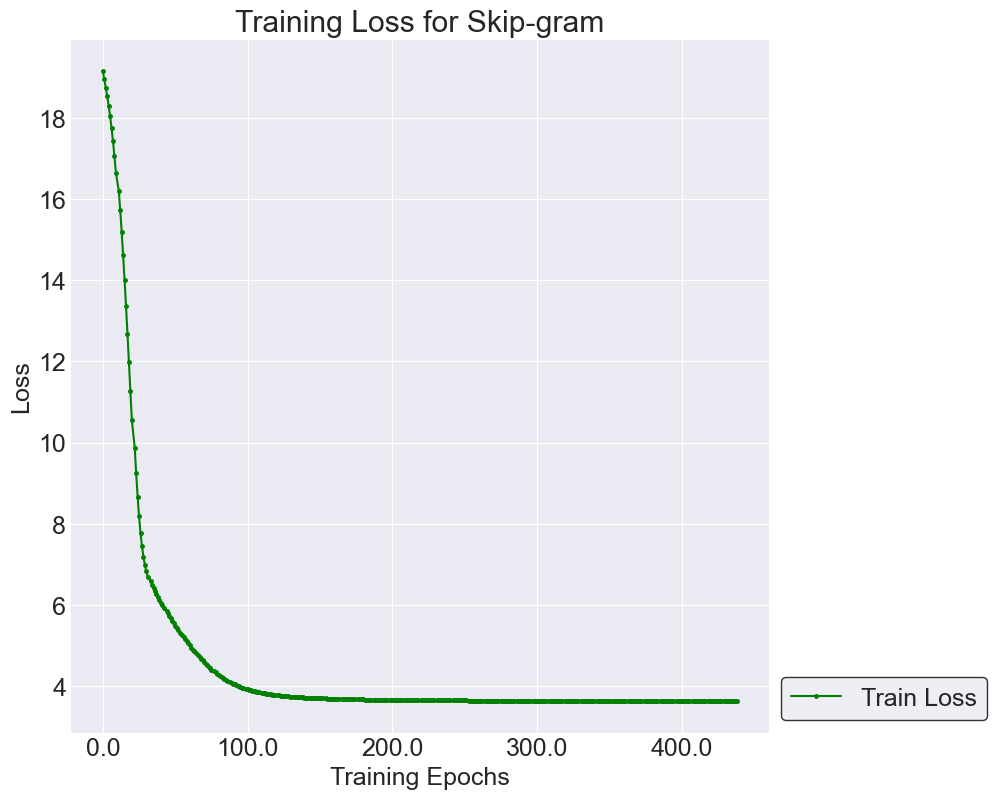

In [5]:
plot_train_loss(hist_1, n_samps=dev_targets_int.shape[0], batch_sz=batch_sz)

### 2. Start to train on a large number of dataset
#### a. Build the training and testing dataset

get a large dataset to train the skipgram

In [6]:
SPAM_FOLDER_PATH = 'data/enron/spam'
num_emails = 200
spam_targets_int, spam_contexts_int, spam_unique_words, spam_word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, num_emails=num_emails)

HAM_FOLDER_PATH = 'data/enron/ham'
ham_targets_int, ham_contexts_int, ham_unique_words, ham_word2ind = preprocess.get_dataset(path2folder1=HAM_FOLDER_PATH, num_emails=num_emails)

targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

get list of corpus for testing purpose

In [7]:
email_indices_to_extract = list(range(int(num_emails*0.8),num_emails))

spam_test_corpus_list = []
ham_test_corpus_list = []
for index in email_indices_to_extract:
    # extract single one email at a time from the spam and the ham
    email_dat = preprocess.extract_sentences_from_path('data/enron/spam', [index])
    corpus = imdb.make_corpus(email_dat)
    spam_test_corpus_list.append(corpus)

    email_dat = preprocess.extract_sentences_from_path('data/enron/ham', [index])
    corpus = imdb.make_corpus(email_dat)
    ham_test_corpus_list.append(corpus)

train the skipgram on the words from both the spam and the ham class

In [8]:
print(len(targets_int))

33971


In [9]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 200
C = vocab_sz
batch_sz = 2000

skipgram = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

hist_1 = skipgram.fit(targets_int, contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=200, print_every=10, verbose=True)

Starting to train network ....
Epoch 0/200, Training Loss: 30.55.
Epoch 10/200, Training Loss: 14.64.
Epoch 20/200, Training Loss: 14.83.
Epoch 30/200, Training Loss: 14.46.
Epoch 40/200, Training Loss: 14.41.
Epoch 50/200, Training Loss: 14.37.
Epoch 60/200, Training Loss: 14.49.
Epoch 70/200, Training Loss: 14.39.
Epoch 80/200, Training Loss: 14.30.
Epoch 90/200, Training Loss: 14.47.
Epoch 100/200, Training Loss: 14.20.
Epoch 110/200, Training Loss: 14.30.
Epoch 120/200, Training Loss: 14.41.
Epoch 130/200, Training Loss: 14.61.
Epoch 140/200, Training Loss: 14.42.
Epoch 150/200, Training Loss: 14.37.
Epoch 160/200, Training Loss: 14.14.
Epoch 170/200, Training Loss: 14.03.
Epoch 180/200, Training Loss: 14.09.
Epoch 190/200, Training Loss: 14.21.


/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_60684/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


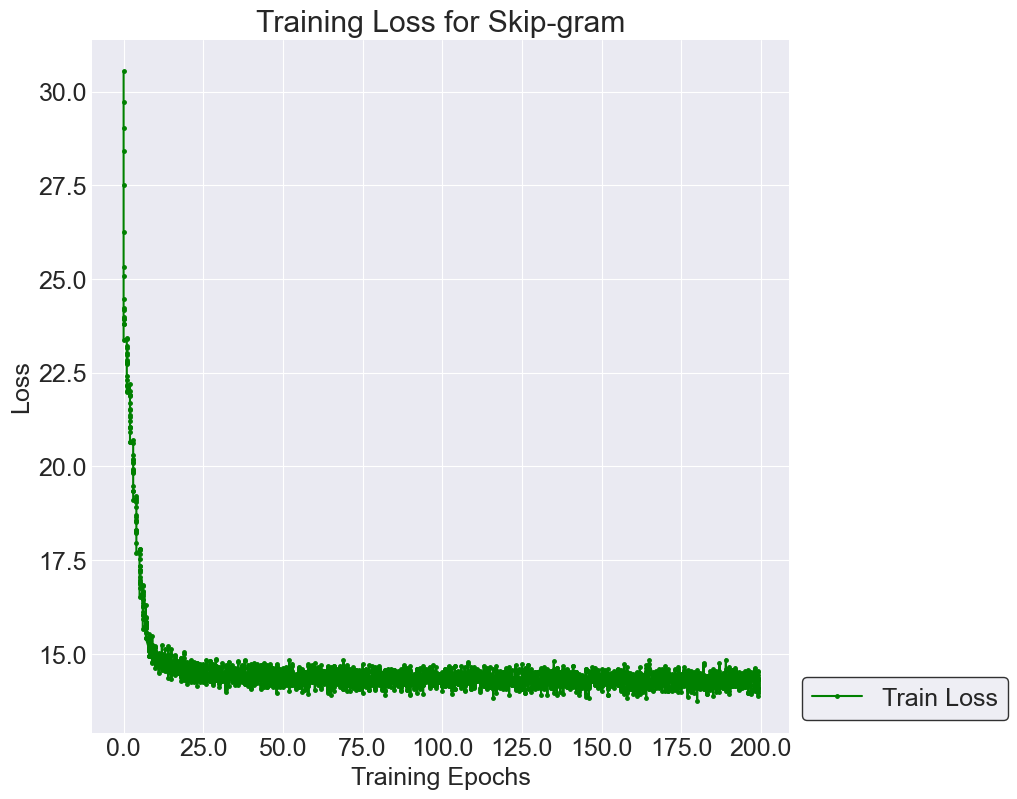

In [10]:
plot_train_loss(hist_1, n_samps=targets_int.shape[0], batch_sz=batch_sz)

b. build training dataset for MLP network

In [11]:
# use a smaller dataset first
# SPAM_FOLDER_PATH = 'data/enron/spam'
# num_emails = 50
# spam_targets_int, spam_contexts_int, spam_unique_words, spam_word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, num_emails=num_emails)
#
# HAM_FOLDER_PATH = 'data/enron/ham'
# ham_targets_int, ham_contexts_int, ham_unique_words, ham_word2ind = preprocess.get_dataset(path2folder1=HAM_FOLDER_PATH, num_emails=num_emails)
#
# targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

In [12]:
word_counter = {} # "word":(count in spam, count in ham)

spam_ind2word = imdb.make_ind2word_mapping(spam_unique_words)
ham_ind2word = imdb.make_ind2word_mapping(ham_unique_words)

for i in spam_targets_int:
    # if the current target word is not recorded, add it to the record
    if spam_ind2word[i] not in word_counter:
        word_counter[spam_ind2word[i]] = [0,0]

    word_counter[spam_ind2word[i]][0] += 1

for i in ham_targets_int:
    if ham_ind2word[i] not in word_counter:
        word_counter[ham_ind2word[i]] = [0,0]

    word_counter[ham_ind2word[i]][1] += 1


In [13]:
class_labels = [] # word: 0 for spam, 1 for ham
for word in unique_words:
    # if the word appears more often in ham, label it as ham
    # otherwise, label it as spam
    if word_counter[word][1] > word_counter[word][0]:
        class_labels.append(1)
    else:
        class_labels.append(0)

construct the numpy array traininig and testing dataset

In [14]:
total_emails = num_emails
num_emails = int(0.8*num_emails)

_, _, train_unique_words, _ = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

In [15]:
from mlp_for_email_prediction import standardize_dataset

In [16]:
test_index_start = len(train_unique_words)
test_unique_words = unique_words[test_index_start:-1]

x_train = skipgram.get_all_word_vectors(word2ind,train_unique_words)
x_test = skipgram.get_all_word_vectors(word2ind,test_unique_words)

y_train = np.array(class_labels[0:test_index_start])
y_test = np.array(class_labels[test_index_start:-1])


In [35]:
x = skipgram.get_all_word_vectors(word2ind,unique_words)
y = np.array(class_labels)

normalize all the data

In [18]:
# x = standardize_dataset(x)
#
# # standardize the training and testing dataset with the same mean and std
# x_train -= np.average(x)
# x_train /= np.std(x)
#
# x_test -= np.average(x)
# x_test /= np.std(x)

start to construct the MLP

In [19]:
print(x.shape,y.shape)
print(x_test.shape,y_test.shape)

(6770, 200) (6770,)
(720, 200) (720,)


In [21]:
H1 = 300
H3 = 1
mlp_net = tf.keras.Sequential(
    [tf.keras.layers.Input(shape=x_train.shape[1]),
    tf.keras.layers.Dense(units=H1, activation='relu'),
    tf.keras.layers.Dense(units=H3, activation='sigmoid')]
)
mlp_net.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               60300     
                                                                 
 dense_4 (Dense)             (None, 1)                 301       
                                                                 
Total params: 60,601
Trainable params: 60,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
mlp_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
hist = mlp_net.fit(x_train, y_train, batch_size=500, epochs=100, validation_data=(x_test, y_test), verbose = 2)


Epoch 1/100


2023-04-20 16:41:10.993708: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-20 16:41:11.263934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-20 16:41:12.211402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 - 2s - loss: 0.6809 - accuracy: 0.5551 - val_loss: 0.5879 - val_accuracy: 0.7167 - 2s/epoch - 119ms/step
Epoch 2/100
13/13 - 0s - loss: 0.6289 - accuracy: 0.6470 - val_loss: 0.6147 - val_accuracy: 0.6625 - 74ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 0.6058 - accuracy: 0.6725 - val_loss: 0.6069 - val_accuracy: 0.6736 - 76ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 0.5890 - accuracy: 0.6854 - val_loss: 0.6060 - val_accuracy: 0.6806 - 72ms/epoch - 6ms/step
Epoch 5/100
13/13 - 0s - loss: 0.5744 - accuracy: 0.6993 - val_loss: 0.6109 - val_accuracy: 0.6944 - 73ms/epoch - 6ms/step
Epoch 6/100
13/13 - 0s - loss: 0.5626 - accuracy: 0.7087 - val_loss: 0.6308 - val_accuracy: 0.6778 - 76ms/epoch - 6ms/step
Epoch 7/100
13/13 - 0s - loss: 0.5496 - accuracy: 0.7203 - val_loss: 0.6030 - val_accuracy: 0.6931 - 74ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 0.5366 - accuracy: 0.7340 - val_loss: 0.6152 - val_accuracy: 0.6806 - 70ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - los

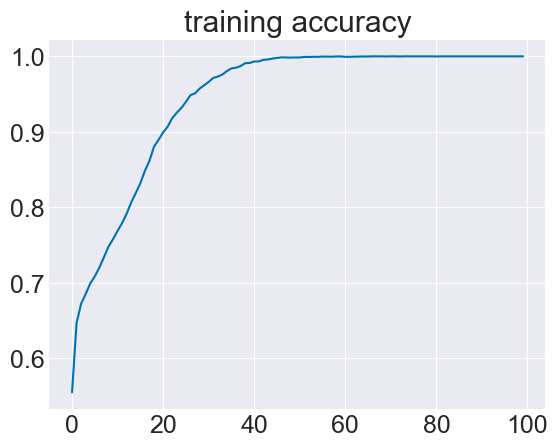

In [24]:
plt.plot(hist.history['accuracy'])
plt.title("training accuracy")
plt.show()

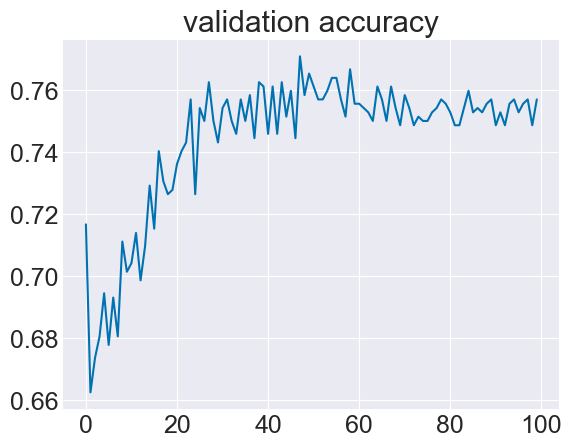

In [25]:
plt.plot(hist.history['val_accuracy'])
plt.title("validation accuracy")
plt.show()

Test accuracy email by email

In [26]:
corpus_list_test = []
y_labels = []
for index in range(num_emails,total_emails):
    # extract single one email at a time from the spam and the ham
    email_dat = preprocess.extract_sentences_from_path('data/enron/spam', [index])
    corpus = imdb.make_corpus(email_dat)
    corpus_list_test.append(corpus)
    y_labels.append(0)

    email_dat = preprocess.extract_sentences_from_path('data/enron/ham', [index])
    corpus = imdb.make_corpus(email_dat)
    corpus_list_test.append(corpus)
    y_labels.append(1)

mlp_for_email_prediction.predict_email(corpus_list_test,y_labels,mlp_net,skipgram,word2ind,10)

100%|██████████| 80/80 [02:08<00:00,  1.61s/it]

prediction accuracy: 0.6724137931034483


The training accuracy rises to 100%, but the validation accuracy is not high, I will use SOM to check if the word embeddings are learned properly

In [43]:
num_words_to_visualize = 3000
word_inds = np.random.choice(len(unique_words), size=num_words_to_visualize, replace=False)
word_vecs = x[word_inds,:]
word_strings = np.array(unique_words)[word_inds]

c = y[word_inds]

print(word_vecs.shape,word_strings.shape)

(3000, 200) (3000,)


In [39]:
data = word_vecs / np.sqrt(np.sum(word_vecs**2,axis=1,keepdims=True))

In [40]:
# Your code here
n_epochs = 150
lr = 3
som_sz = (300, 300)
sigma = 100
n_features = data.shape[1]

imdb_som = som.SOM(map_sz=som_sz, num_feats=n_features)

In [41]:
imdb_som.initialize_wts_with_pc(data)

test


In [42]:
imdb_som.fit(x = data, n_epochs=n_epochs, lr=lr, lr_decay=0.9999, sigma=sigma, sigma_decay=0.9999, print_every=1, verbose=True)

Starting to train network ....
Epoch 0/150, Learning rate: 2.9701, Sigma: 99.0049, Error: 1.1740.
Epoch 1/150, Learning rate: 2.9406, Sigma: 98.0198, Error: 1.1074.
Epoch 2/150, Learning rate: 2.9113, Sigma: 97.0444, Error: 1.1208.
Epoch 3/150, Learning rate: 2.8824, Sigma: 96.0788, Error: 1.0768.
Epoch 4/150, Learning rate: 2.8537, Sigma: 95.1227, Error: 1.0807.
Epoch 5/150, Learning rate: 2.8253, Sigma: 94.1762, Error: 1.0879.
Epoch 6/150, Learning rate: 2.7972, Sigma: 93.2391, Error: 1.1065.
Epoch 7/150, Learning rate: 2.7693, Sigma: 92.3113, Error: 1.1114.
Epoch 8/150, Learning rate: 2.7418, Sigma: 91.3927, Error: 1.0596.
Epoch 9/150, Learning rate: 2.7145, Sigma: 90.4833, Error: 1.0663.
Epoch 10/150, Learning rate: 2.6875, Sigma: 89.5829, Error: 1.1261.
Epoch 11/150, Learning rate: 2.6607, Sigma: 88.6915, Error: 1.0267.
Epoch 12/150, Learning rate: 2.6343, Sigma: 87.8090, Error: 1.0630.
Epoch 13/150, Learning rate: 2.6081, Sigma: 86.9352, Error: 1.0948.
Epoch 14/150, Learning rate

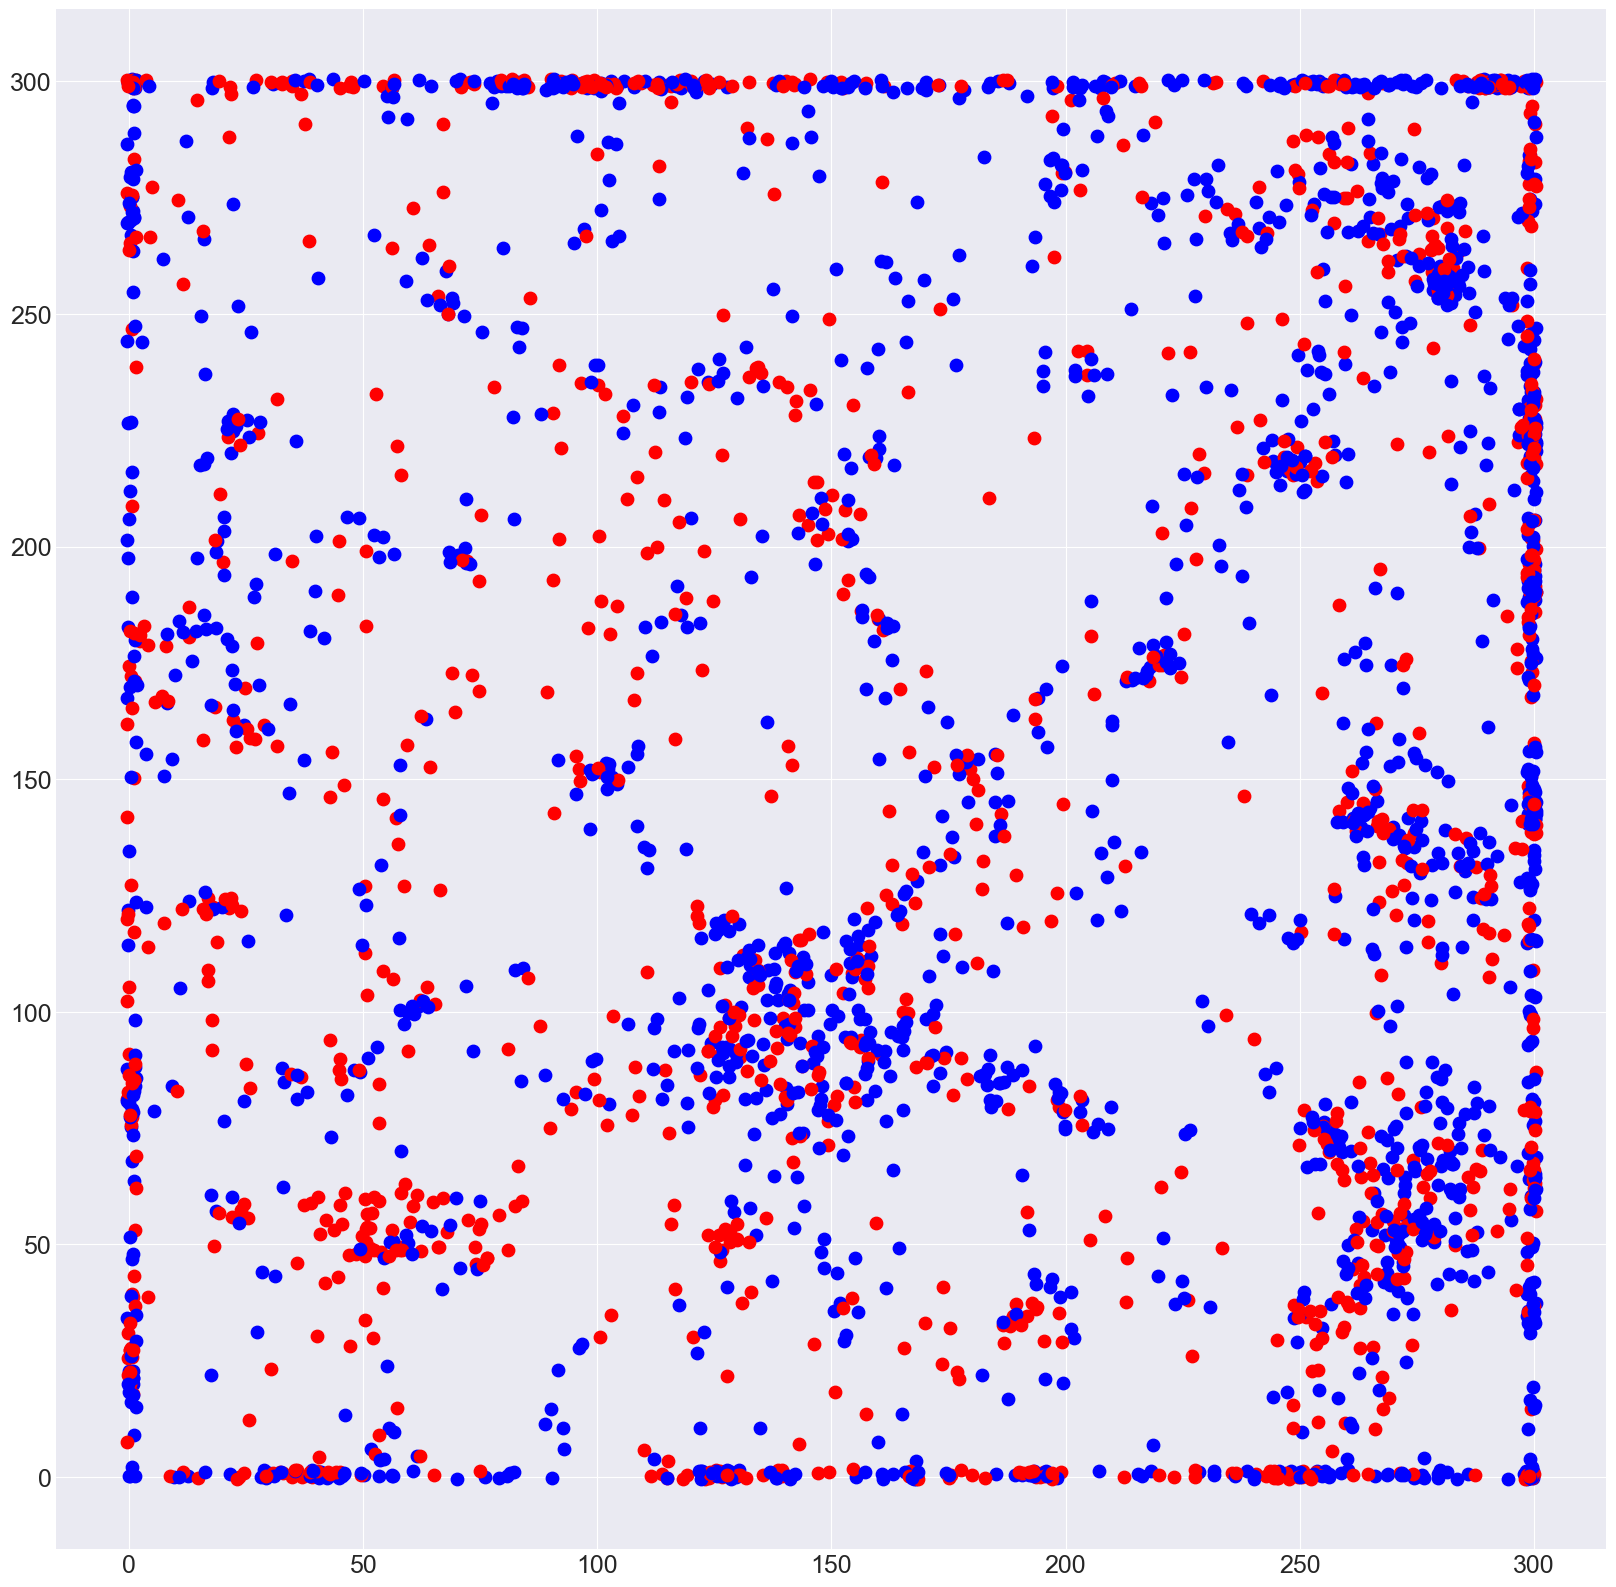

In [44]:
from adjustText import adjust_text

jitter = 1
jitter_xy = np.random.uniform(low=-jitter, high=jitter, size=(num_words_to_visualize, 2))

fig, ax = plt.subplots(figsize=(20, 20))
colors = ['r', 'b']

texts = []
for i in range(num_words_to_visualize):
    bmu_pos = imdb_som.get_bmu(word_vecs[i])
    # jitter the placement of words so that they are less likely to plot ontop of each other
    x_pos = bmu_pos[0] + 0.5 + jitter_xy[i, 0]
    y_pos = bmu_pos[1] + 0.5 + jitter_xy[i, 1]
    ax.scatter(x_pos, y_pos, s=80, c=colors[c[i]])
    # texts.append(ax.annotate(str(word_strings[i]), xy=(x, y), fontsize=30))
# adjust_text(texts)
plt.show()